# Preprocessing

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\rayss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rayss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\rayss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv('scraped_cnn_news_100_pages_expanded.csv')

In [4]:
# Show the original table
print("Before any preprocessing:")
print(df)

Before any preprocessing:
                 keyword                                              title  \
0      Government policy  Fareed Zakaria: One secret to America's econom...   
1      Government policy  Fed’s triumph over inflation shows the need fo...   
2      Government policy  Tired of shutdown threats? Try to understand t...   
3      Government policy  Newsom signs bill to regulate social media use...   
4      Government policy  As threats grow, funds for election security s...   
...                  ...                                                ...   
13216   Defense spending  Why Fed officials aren’t addressing the Israel...   
13217   Defense spending               Opinion: Netanyahu needs an end-game   
13218   Defense spending  Opinion: War didn’t look like this when the Ge...   
13219   Defense spending  Biden promises to request ‘unprecedented suppo...   
13220   Defense spending  What the Israel-Hamas war means for defense st...   

                         

In [5]:
# Drop rows with missing values in 'desc' (description) column
df.dropna(subset=['desc'], inplace=True)

# Show the table after removing missing values and duplicates
print("\nAfter removing missing values:")
print(df)



After removing missing values:
                 keyword                                              title  \
0      Government policy  Fareed Zakaria: One secret to America's econom...   
1      Government policy  Fed’s triumph over inflation shows the need fo...   
2      Government policy  Tired of shutdown threats? Try to understand t...   
3      Government policy  Newsom signs bill to regulate social media use...   
4      Government policy  As threats grow, funds for election security s...   
...                  ...                                                ...   
13216   Defense spending  Why Fed officials aren’t addressing the Israel...   
13217   Defense spending               Opinion: Netanyahu needs an end-game   
13218   Defense spending  Opinion: War didn’t look like this when the Ge...   
13219   Defense spending  Biden promises to request ‘unprecedented suppo...   
13220   Defense spending  What the Israel-Hamas war means for defense st...   

                   

In [6]:
# Step 1: Lowercasing
df['lower_title'] = df['title'].str.lower()
df['lower_desc'] = df['desc'].str.lower()
print("\nAfter Lowercasing Titles and Descriptions:")
print(df[['lower_title', 'lower_desc']].head())


After Lowercasing Titles and Descriptions:
                                         lower_title  \
0  fareed zakaria: one secret to america's econom...   
1  fed’s triumph over inflation shows the need fo...   
2  tired of shutdown threats? try to understand t...   
3  newsom signs bill to regulate social media use...   
4  as threats grow, funds for election security s...   

                                          lower_desc  
0  the federal reserve may have committed errors ...  
1  in the clamor of the campaign season, we are m...  
2  the current government drama should feel so fa...  
3  california gov. gavin newsom on friday signed ...  
4  election officials across the country struggle...  


In [7]:
# Step 2: Remove Special Characters and Punctuation
df['lower_title'] = df['lower_title'].fillna('')
df['lower_desc'] = df['lower_desc'].fillna('')

df['cleaned_title'] = df['lower_title'].apply(lambda x: re.sub(r'\W+', ' ', str(x)))
df['cleaned_desc'] = df['lower_desc'].apply(lambda x: re.sub(r'\W+', ' ', str(x)))

print("\nAfter Removing Special Characters and Punctuation:")
print(df[['cleaned_title', 'cleaned_desc']].head())



After Removing Special Characters and Punctuation:
                                       cleaned_title  \
0  fareed zakaria one secret to america s economi...   
1  fed s triumph over inflation shows the need fo...   
2  tired of shutdown threats try to understand th...   
3  newsom signs bill to regulate social media use...   
4  as threats grow funds for election security se...   

                                        cleaned_desc  
0  the federal reserve may have committed errors ...  
1  in the clamor of the campaign season we are mi...  
2  the current government drama should feel so fa...  
3  california gov gavin newsom on friday signed a...  
4  election officials across the country struggle...  


In [8]:
## Step 3: Tokenization
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function to tokenize text using spaCy
def tokenize_text_spacy(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]  # Tokenize using spaCy
    return tokens

# Apply tokenization to the cleaned columns
df['tokenized_title'] = df['cleaned_title'].apply(tokenize_text_spacy)
df['tokenized_desc'] = df['cleaned_desc'].apply(tokenize_text_spacy)

# Show the result after tokenization
print(df[['tokenized_title', 'tokenized_desc']].head())


                                     tokenized_title  \
0  [fareed, zakaria, one, secret, to, america, s,...   
1  [fed, s, triumph, over, inflation, shows, the,...   
2  [tired, of, shutdown, threats, try, to, unders...   
3  [newsom, signs, bill, to, regulate, social, me...   
4  [as, threats, grow, funds, for, election, secu...   

                                      tokenized_desc  
0  [the, federal, reserve, may, have, committed, ...  
1  [in, the, clamor, of, the, campaign, season, w...  
2  [the, current, government, drama, should, feel...  
3  [california, gov, gavin, newsom, on, friday, s...  
4  [election, officials, across, the, country, st...  


In [9]:
## Step 4: Remove Stopwords

from nltk.corpus import stopwords

# Define stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = {'cnn', 'news', 'say', 'u', 'will', 's', 'll', 've', 're', 't', 'd', 'm'}  # Add contraction artifacts
stop_words.update(additional_stopwords)

# Remove stopwords from tokenized text
df['no_stopwords_title'] = df['tokenized_title'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df['no_stopwords_desc'] = df['tokenized_desc'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

print("\nAfter Stopword Removal:")
print(df[['no_stopwords_title', 'no_stopwords_desc']].head())



After Stopword Removal:
                                  no_stopwords_title  \
0  [fareed, zakaria, one, secret, america, econom...   
1  [fed, triumph, inflation, shows, need, institu...   
2  [tired, shutdown, threats, try, understand, we...   
3  [newsom, signs, bill, regulate, social, media,...   
4  [threats, grow, funds, election, security, see...   

                                   no_stopwords_desc  
0  [federal, reserve, may, committed, errors, alo...  
1  [clamor, campaign, season, missing, landmark, ...  
2       [current, government, drama, feel, familiar]  
3  [california, gov, gavin, newsom, friday, signe...  
4  [election, officials, across, country, struggl...  


In [10]:
## Step 5: Lemmatization

nltk.download('wordnet')
nltk.download('omw-1.4')  # Download wordnet model


[nltk_data] Downloading package wordnet to C:\Users\rayss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\rayss/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the tokens
df['lemmatized_title'] = df['no_stopwords_title'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df['lemmatized_desc'] = df['no_stopwords_desc'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Show the result after lemmatization
print("\nAfter Lemmatization:")
print(df[['lemmatized_title', 'lemmatized_desc']].head())



After Lemmatization:
                                    lemmatized_title  \
0  [fareed, zakaria, one, secret, america, econom...   
1  [fed, triumph, inflation, show, need, institut...   
2  [tired, shutdown, threat, try, understand, wei...   
3  [newsom, sign, bill, regulate, social, medium,...   
4  [threat, grow, fund, election, security, see, ...   

                                     lemmatized_desc  
0  [federal, reserve, may, committed, error, alon...  
1  [clamor, campaign, season, missing, landmark, ...  
2       [current, government, drama, feel, familiar]  
3  [california, gov, gavin, newsom, friday, signe...  
4  [election, official, across, country, struggle...  


In [12]:
# Join the tokens back into a string
df['final_cleaned_title'] = df['lemmatized_title'].apply(lambda tokens: ' '.join(tokens))
df['final_cleaned_desc'] = df['lemmatized_desc'].apply(lambda tokens: ' '.join(tokens))

# Show the final cleaned text
print("\nFinal Cleaned Title and Description (Joined Tokens):")
print(df[['final_cleaned_title', 'final_cleaned_desc']].head())



Final Cleaned Title and Description (Joined Tokens):
                                 final_cleaned_title  \
0  fareed zakaria one secret america economic str...   
1  fed triumph inflation show need institution fr...   
2  tired shutdown threat try understand weird way...   
3  newsom sign bill regulate social medium use am...   
4     threat grow fund election security see squeeze   

                                  final_cleaned_desc  
0  federal reserve may committed error along way ...  
1      clamor campaign season missing landmark event  
2             current government drama feel familiar  
3  california gov gavin newsom friday signed bill...  
4  election official across country struggle enha...  


In [13]:
# Show the table before and after preprocessing
print("\nBefore Preprocessing (Original Title and Description):")
print(df[['title', 'desc']].head())

print("\nAfter Preprocessing (Final Cleaned Title and Description):")
print(df[['final_cleaned_title', 'final_cleaned_desc']].head())



Before Preprocessing (Original Title and Description):
                                               title  \
0  Fareed Zakaria: One secret to America's econom...   
1  Fed’s triumph over inflation shows the need fo...   
2  Tired of shutdown threats? Try to understand t...   
3  Newsom signs bill to regulate social media use...   
4  As threats grow, funds for election security s...   

                                                desc  
0  The Federal Reserve may have committed errors ...  
1  In the clamor of the campaign season, we are m...  
2  The current government drama should feel so fa...  
3  California Gov. Gavin Newsom on Friday signed ...  
4  Election officials across the country struggle...  

After Preprocessing (Final Cleaned Title and Description):
                                 final_cleaned_title  \
0  fareed zakaria one secret america economic str...   
1  fed triumph inflation show need institution fr...   
2  tired shutdown threat try understand weird way

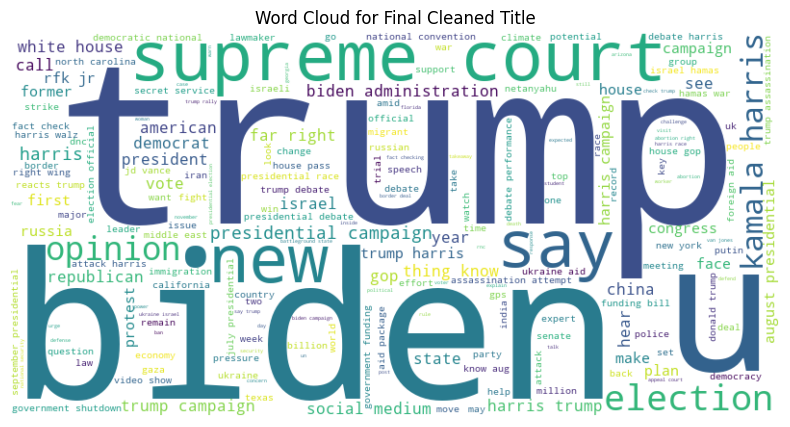

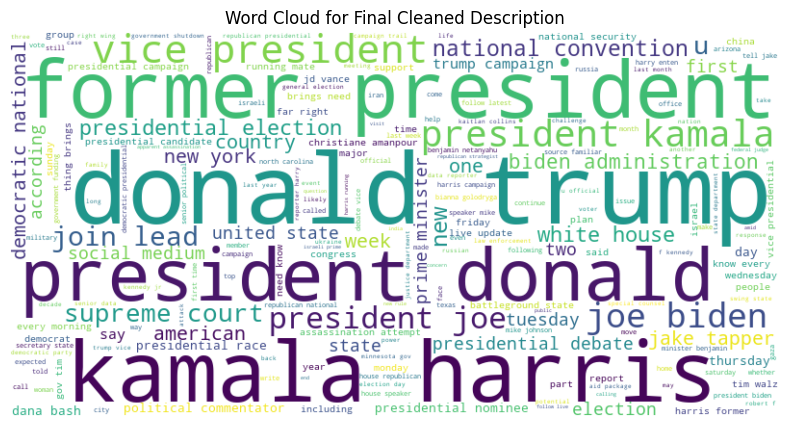

In [15]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for 'final_cleaned_title' and 'final_cleaned_desc'

# Concatenate all the text in the 'final_cleaned_title' column
title_text = ' '.join(df['final_cleaned_title'].astype(str).tolist())

# Create the word cloud for 'final_cleaned_title'
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(title_text)

# Plot the word cloud for 'final_cleaned_title'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Final Cleaned Title')
plt.show()

# Concatenate all the text in the 'final_cleaned_desc' column
desc_text = ' '.join(df['final_cleaned_desc'].astype(str).tolist())

# Create the word cloud for 'final_cleaned_desc'
wordcloud_desc = WordCloud(width=800, height=400, background_color='white').generate(desc_text)

# Plot the word cloud for 'final_cleaned_desc'
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Final Cleaned Description')
plt.show()
